
### Scatter Plot & Correlation ###

Correlation Matrix:
                       fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual 

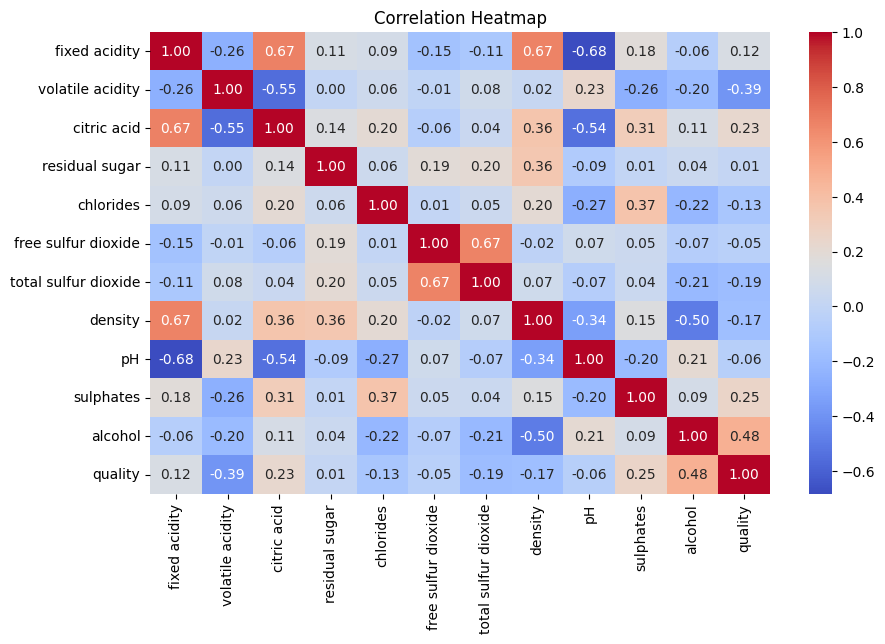

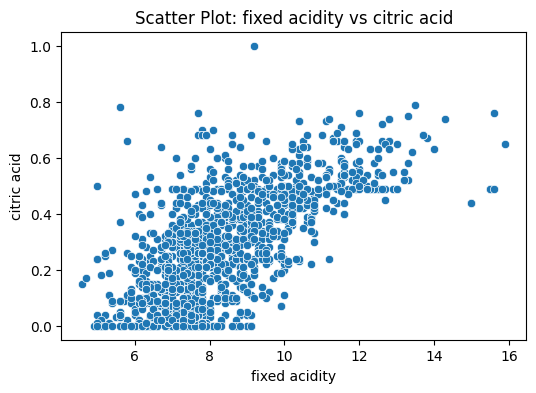

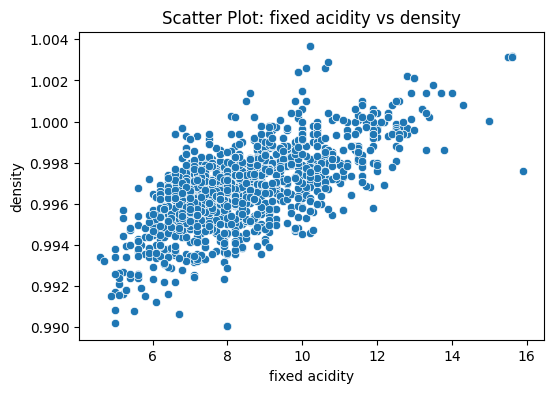

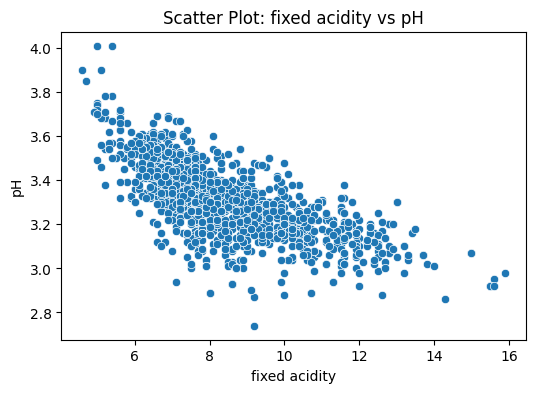

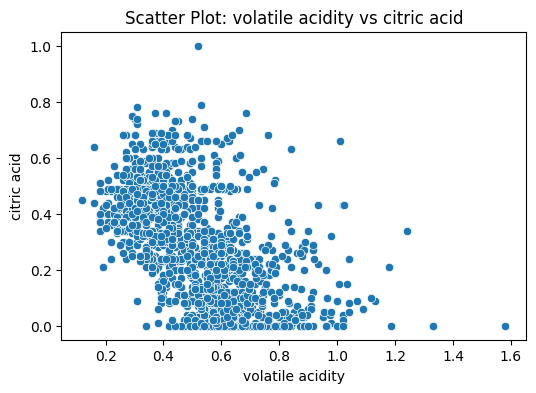

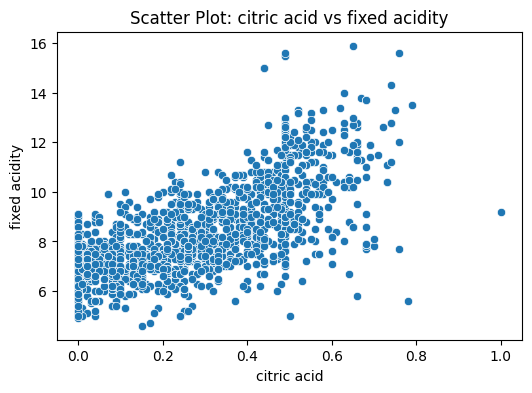

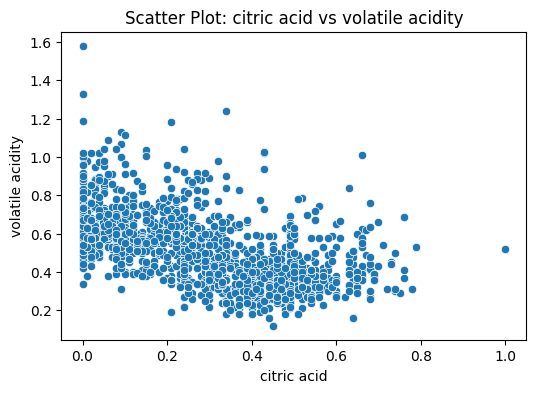

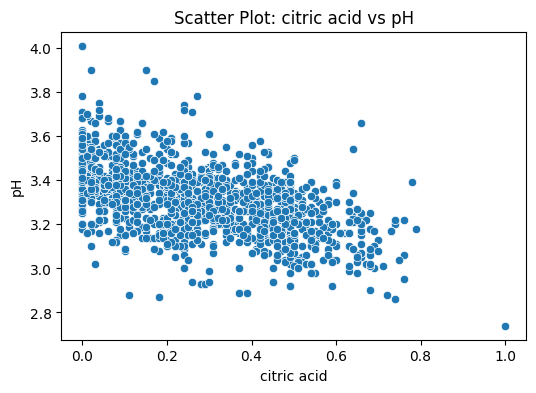

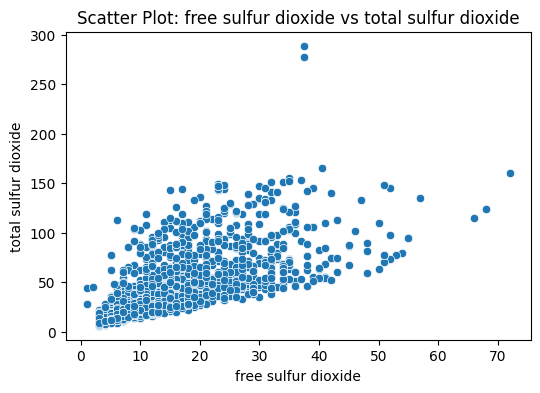

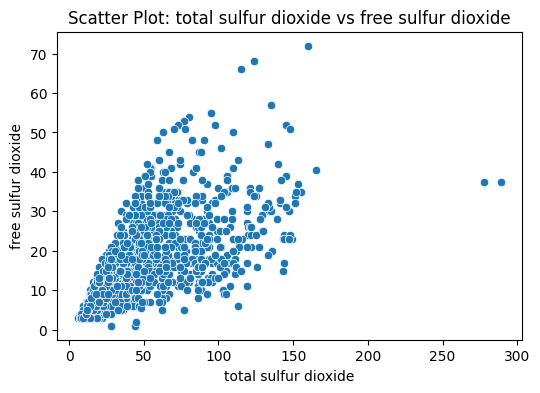

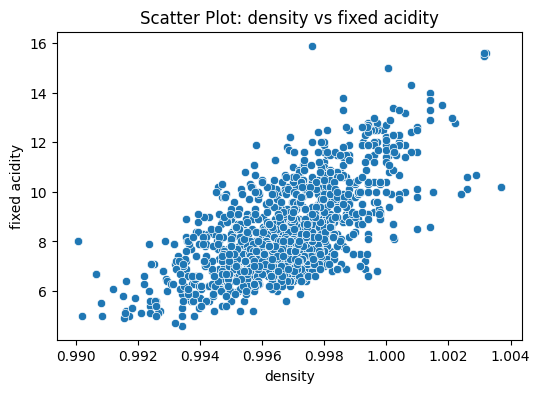

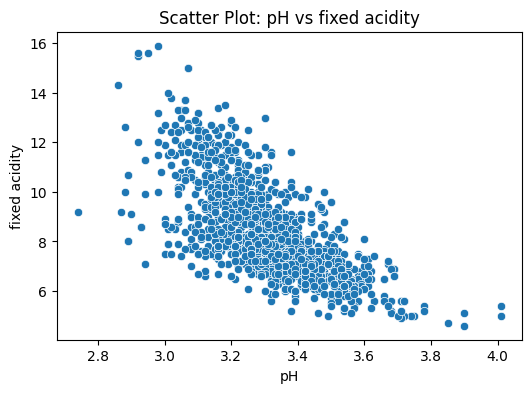

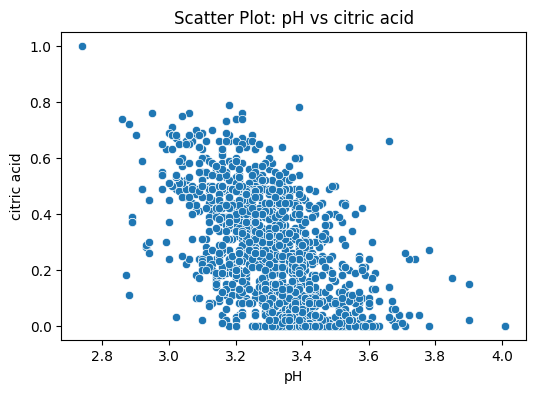


### Chi-Square Test for Categorical Variables ###

No categorical-categorical variables to analyze.

### Numerical vs. Categorical Analysis ###



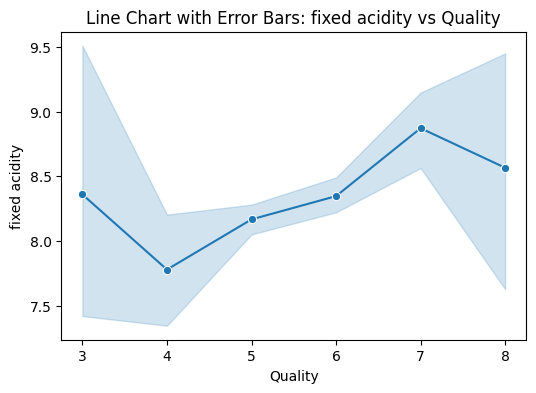

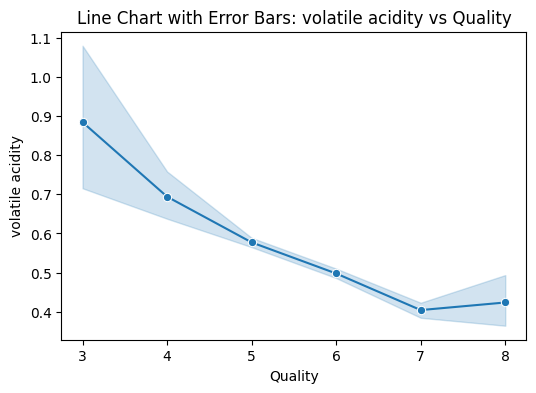

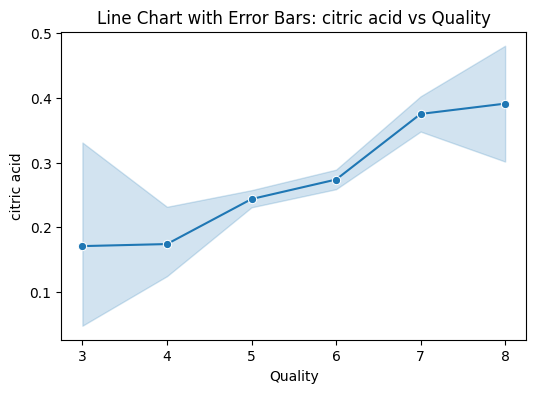

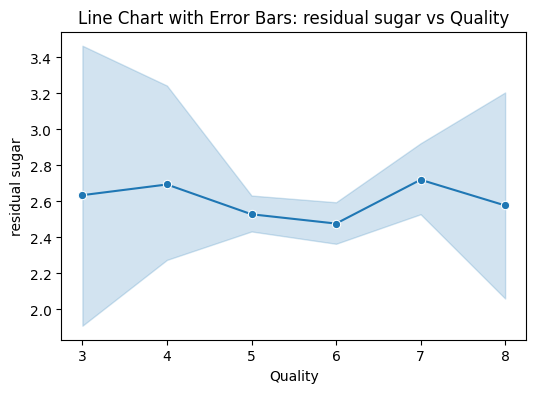

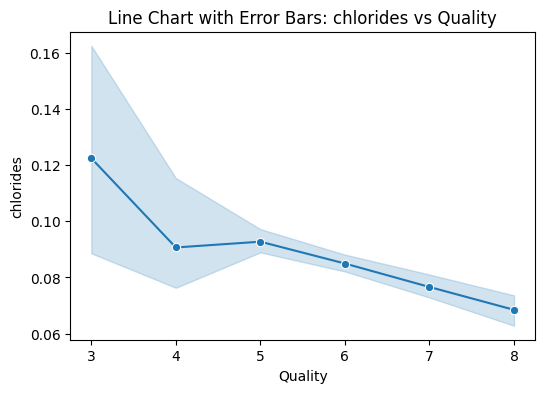

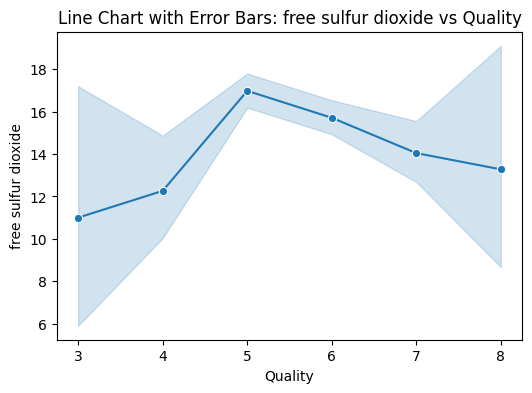

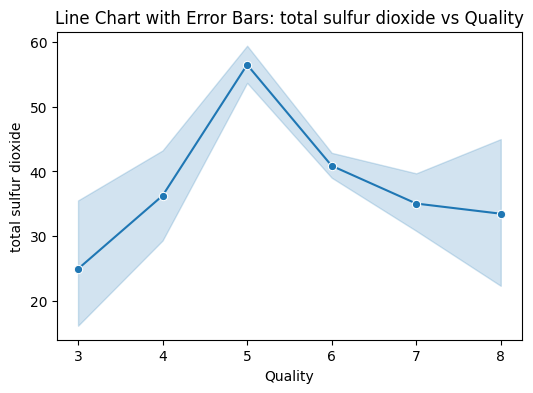

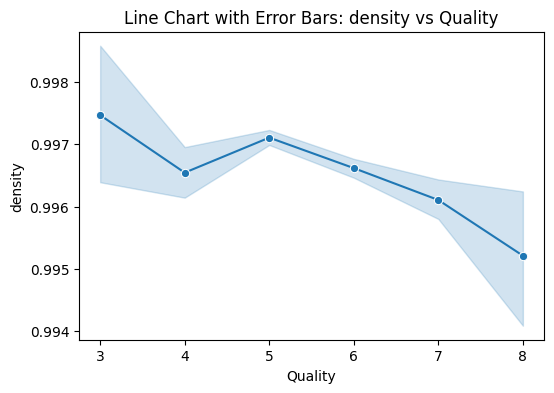

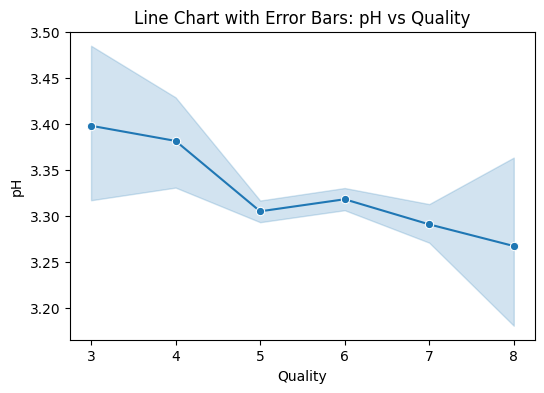

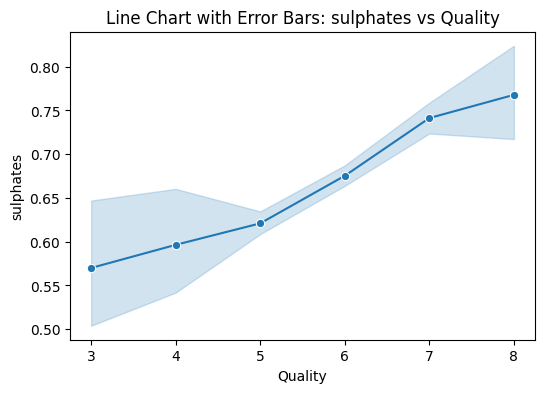

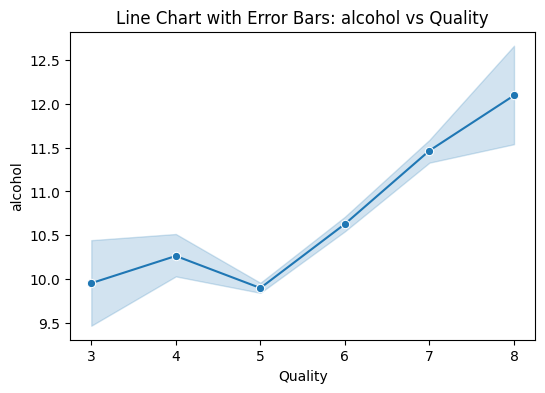

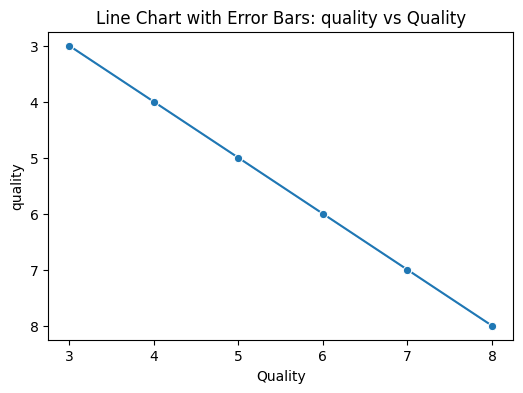

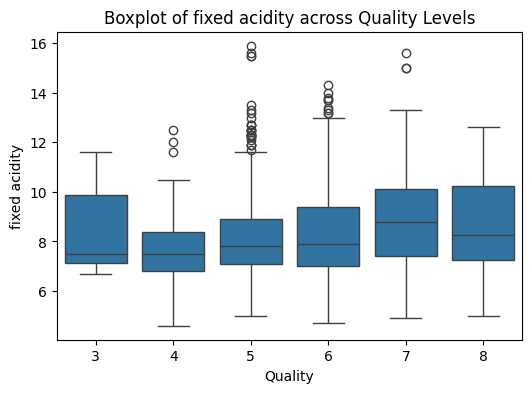

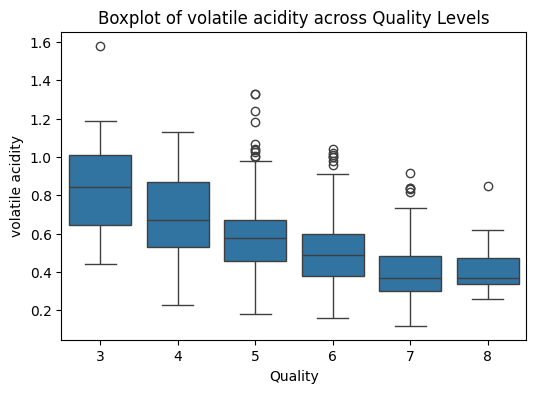

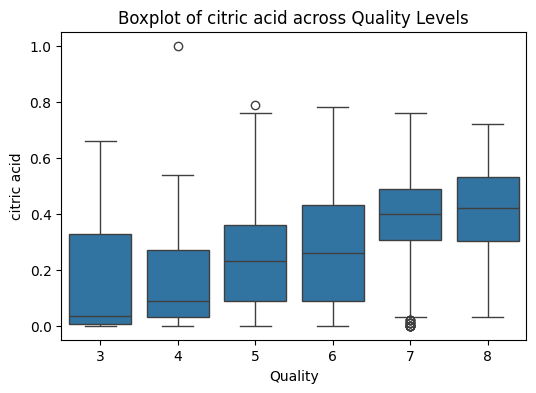

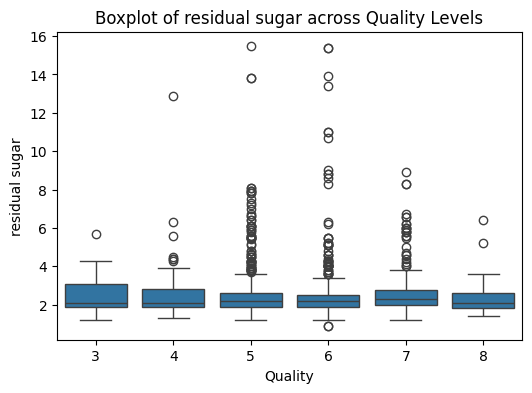

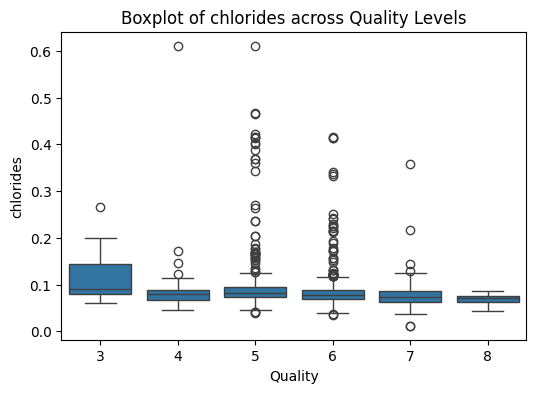

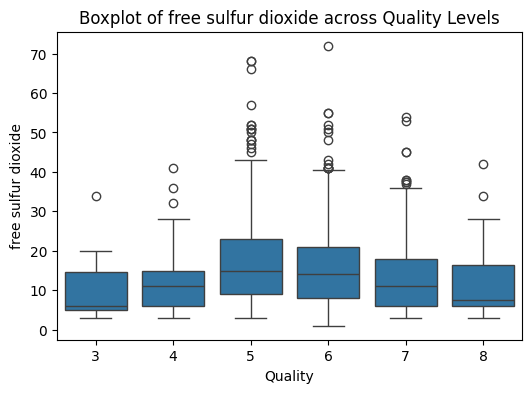

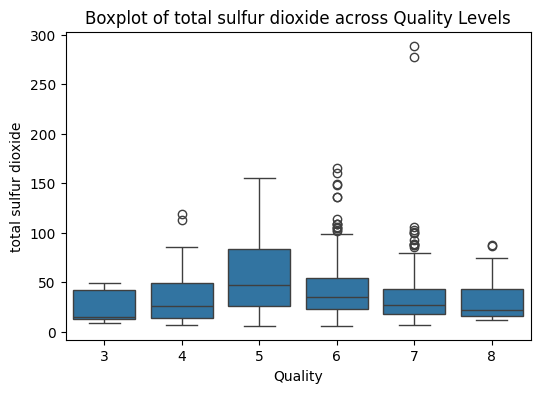

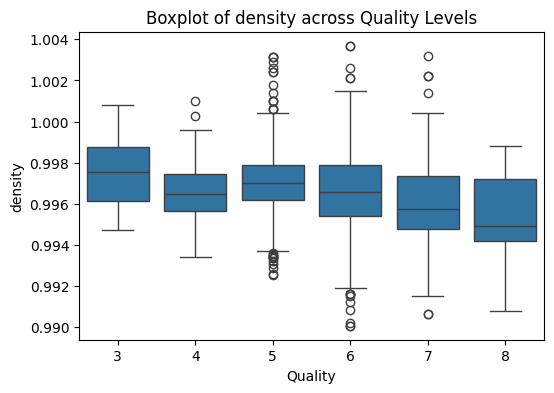

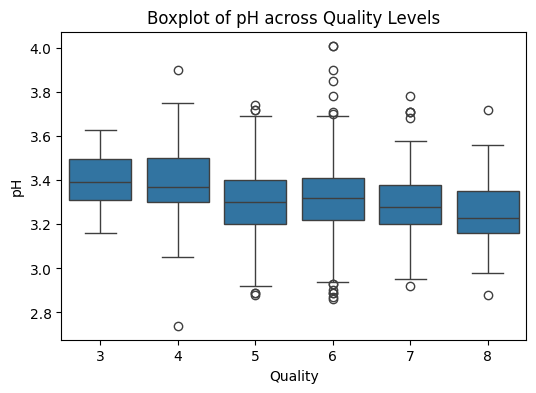

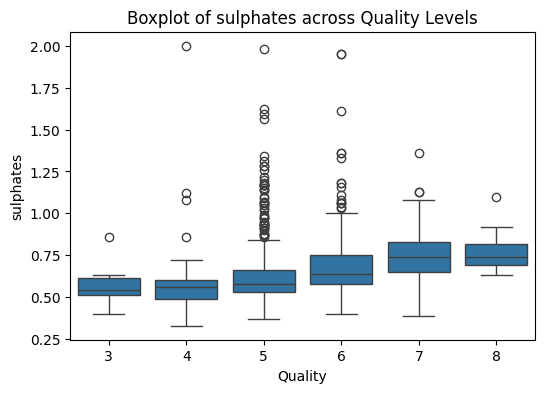

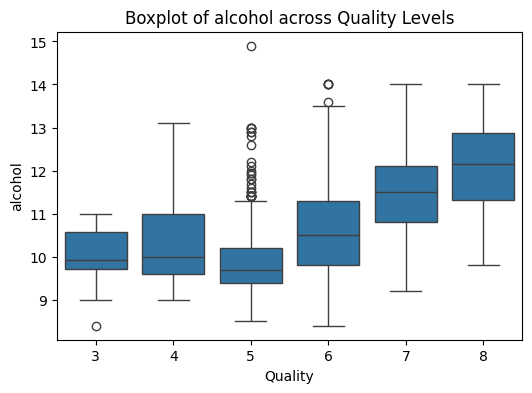

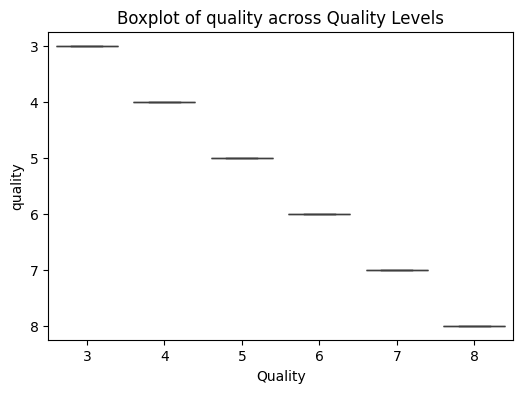


T-Test for fixed acidity (Quality 3 vs 8): t = -0.261240315524843, p = 0.7959654556020868

T-Test for volatile acidity (Quality 3 vs 8): t = 5.141735208056272, p = 2.3127479460333114e-05

T-Test for citric acid (Quality 3 vs 8): t = -2.553161381034842, p = 0.01688821234608663

T-Test for residual sugar (Quality 3 vs 8): t = 0.10884995419398848, p = 0.914157236822163

T-Test for chlorides (Quality 3 vs 8): t = 3.417823602226311, p = 0.0020887005807749223

T-Test for free sulfur dioxide (Quality 3 vs 8): t = -0.5400241438421759, p = 0.5937761921962628

T-Test for total sulfur dioxide (Quality 3 vs 8): t = -0.94914532864862, p = 0.3512863671210411

T-Test for density (Quality 3 vs 8): t = 2.5317334954718174, p = 0.01773345858569555

T-Test for pH (Quality 3 vs 8): t = 1.8115010700192105, p = 0.08163150286666172

T-Test for sulphates (Quality 3 vs 8): t = -4.259734941065799, p = 0.0002368295837934343

T-Test for alcohol (Quality 3 vs 8): t = -4.928864849946284, p = 4.054415993795218e-05



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


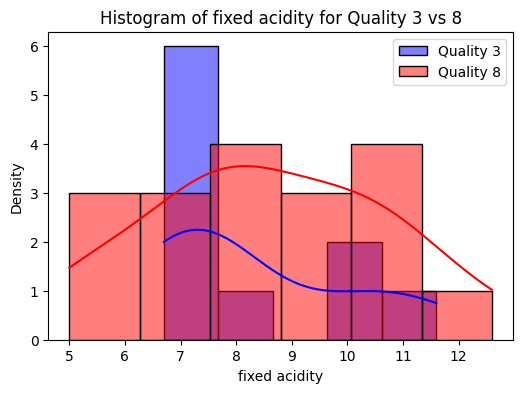

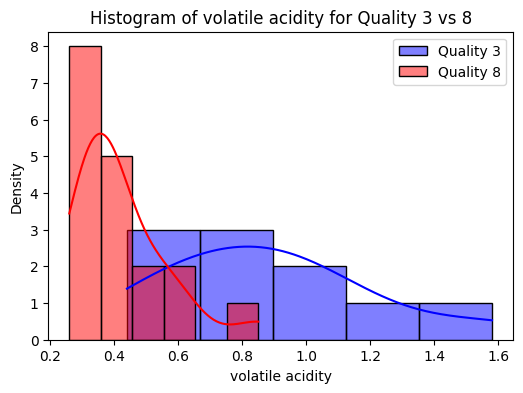

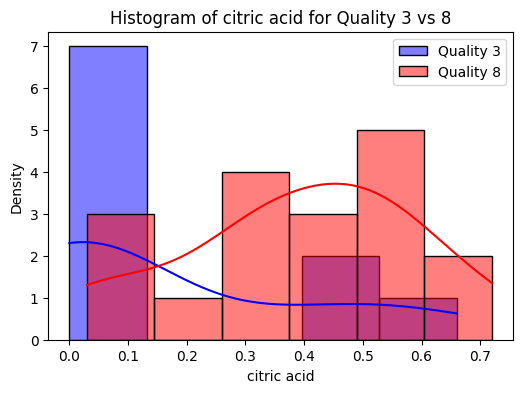

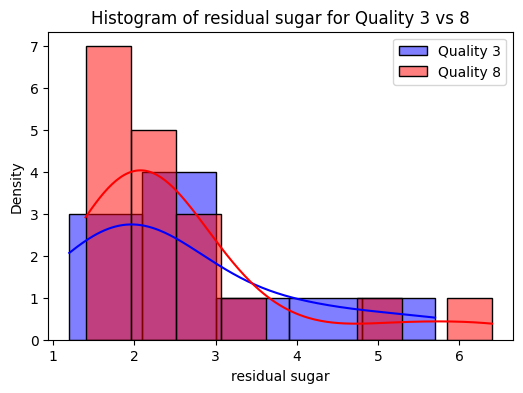

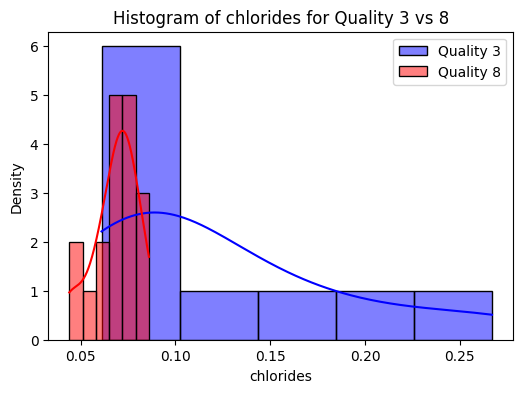

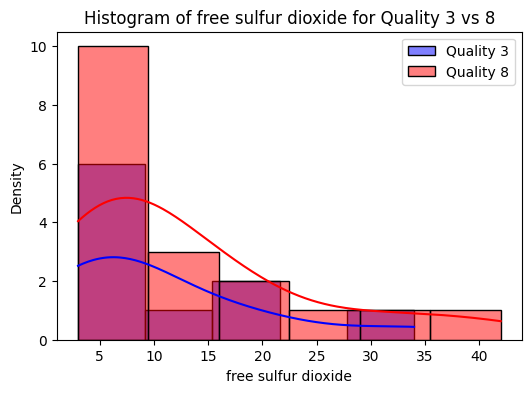

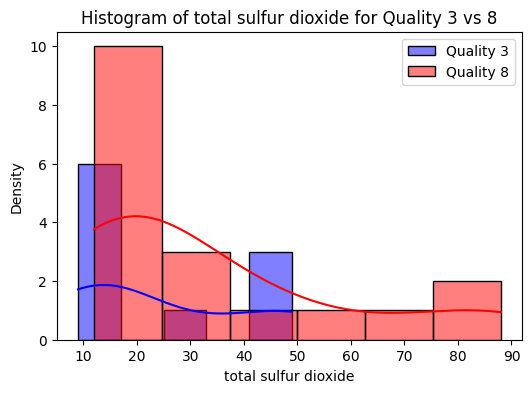

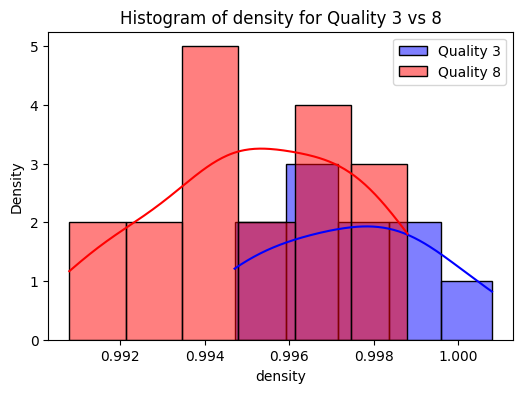

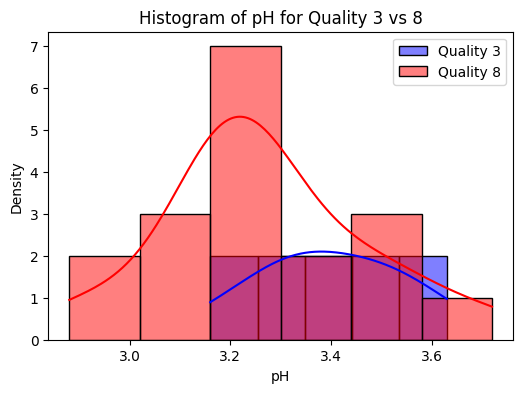

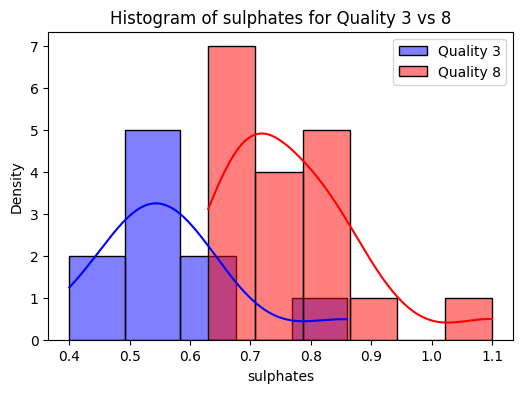

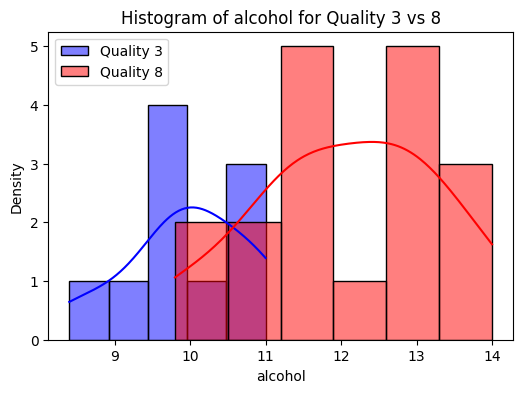

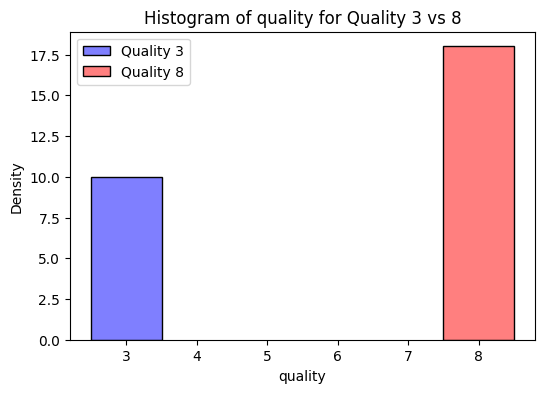


### Mean Comparison Across Quality Levels ###

         fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.360000          0.884500     0.171000        2.635000   
4             7.779245          0.693962     0.174151        2.694340   
5             8.167254          0.577041     0.243686        2.528855   
6             8.347179          0.497484     0.273824        2.477194   
7             8.872362          0.403920     0.375176        2.720603   
8             8.566667          0.423333     0.391111        2.577778   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.122500            11.000000             24.900000  0.997464   
4         0.090679            12.264151             36.245283  0.996542   
5         0.092736            16.983847             56.513950  0.99

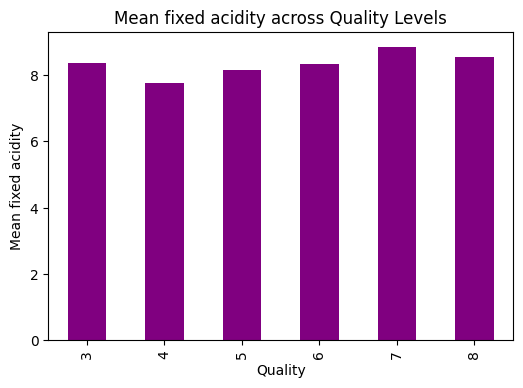

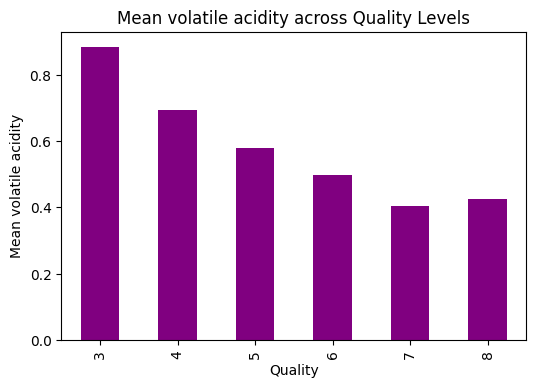

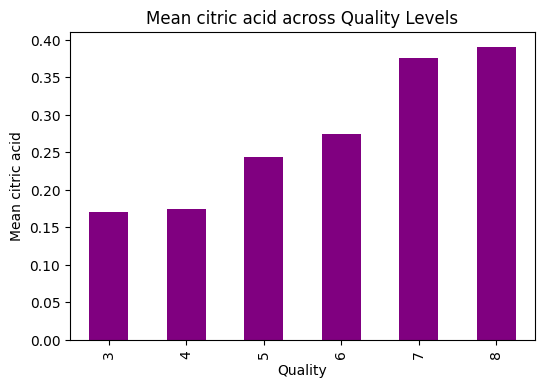

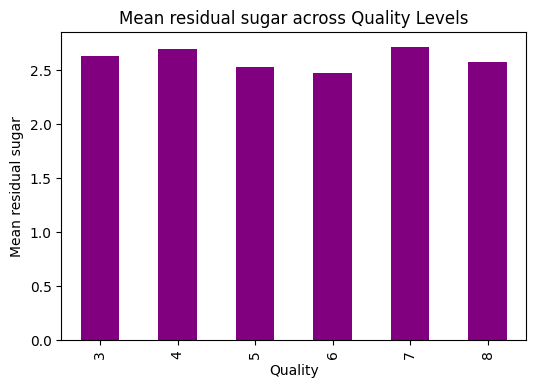

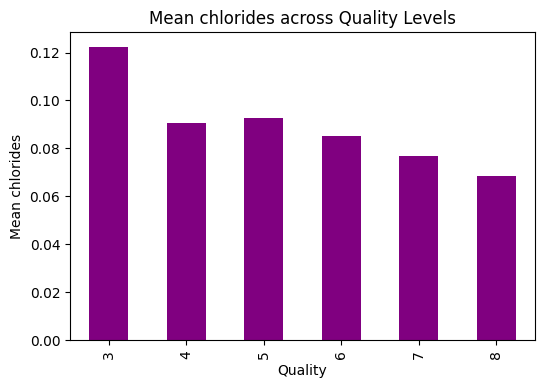

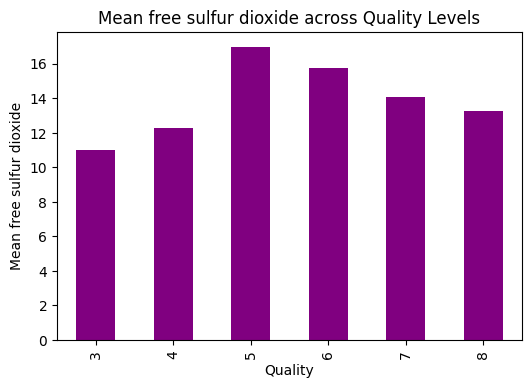

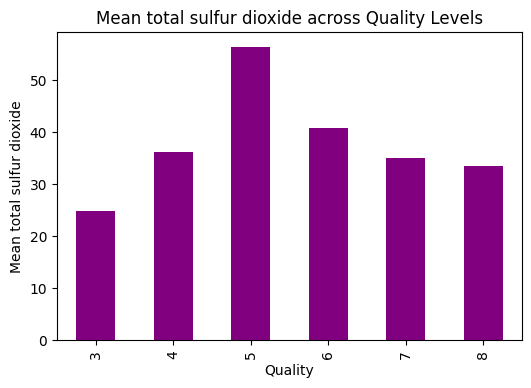

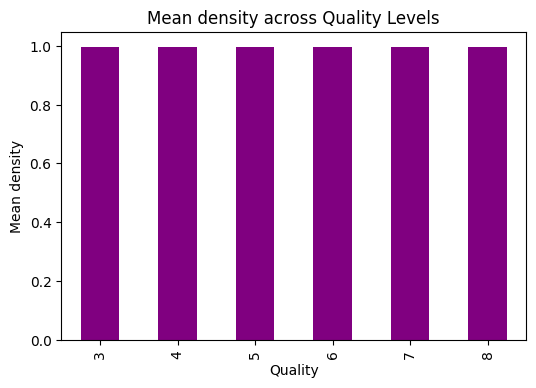

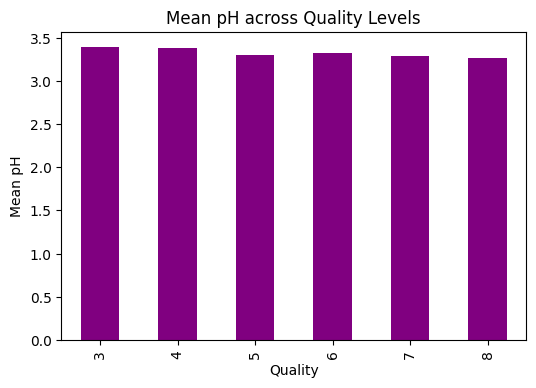

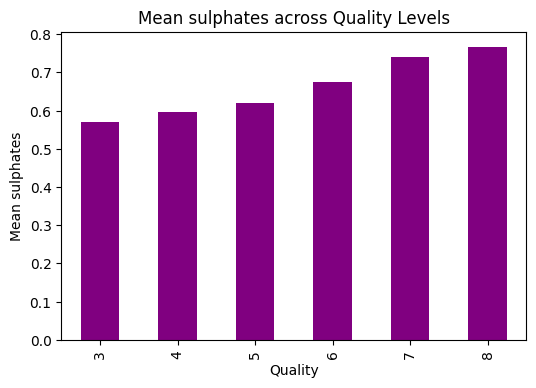

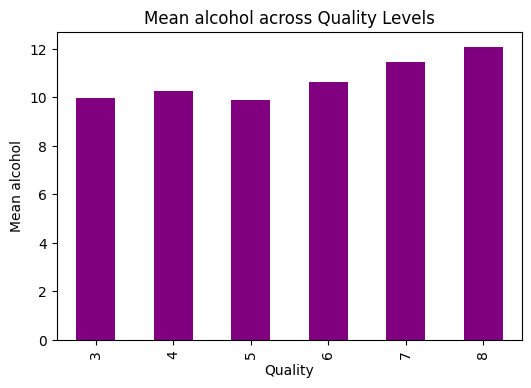

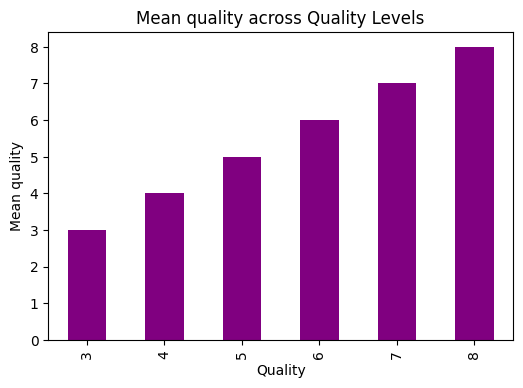

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, pearsonr, ttest_ind, f_oneway

# Load the Wine Quality Dataset
file_path = "/content/winequality-red.csv"
df = pd.read_csv(file_path)

# 1. Numerical & Numerical: Scatter Plot & Correlation
print("\n### Scatter Plot & Correlation ###\n")

# Ensure numerical columns exist
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = [col for col in num_cols if col in df.columns]  # Remove invalid columns

if len(num_cols) == 0:
    print("Error: No numerical columns found.")
else:
    # Correlation Matrix
    corr_matrix = df.corr()
    print("Correlation Matrix:\n", corr_matrix)

    # Plot heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

    # Scatter plots for highly correlated variables
    high_corr_pairs = [(i, j) for i in num_cols for j in num_cols if i != j and abs(corr_matrix.loc[i, j]) > 0.5]

    for x, y in high_corr_pairs:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[x], y=df[y])
        plt.title(f"Scatter Plot: {x} vs {y}")
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()

# 2. Categorical & Categorical: Chi-Square Test
print("\n### Chi-Square Test for Categorical Variables ###\n")

cat_cols = df.select_dtypes(include=['object', 'category']).columns

if len(cat_cols) >= 2:
    for i in range(len(cat_cols)):
        for j in range(i + 1, len(cat_cols)):
            table = pd.crosstab(df[cat_cols[i]], df[cat_cols[j]])
            chi2, p, dof, expected = chi2_contingency(table)
            print(f"\nChi-Square Test between {cat_cols[i]} and {cat_cols[j]}")
            print(f"Chi2 = {chi2}, p-value = {p}, DOF = {dof}")

            # Stacked Column Chart
            table.plot(kind="bar", stacked=True, figsize=(6, 4))
            plt.title(f"Stacked Bar Chart: {cat_cols[i]} vs {cat_cols[j]}")
            plt.ylabel("Count")
            plt.show()
else:
    print("No categorical-categorical variables to analyze.")

# 3. Numerical & Categorical: Line Chart, T-Test, ANOVA
print("\n### Numerical vs. Categorical Analysis ###\n")

if "quality" in df.columns:  # Assuming 'quality' is categorical
    df["quality"] = df["quality"].astype("category")

    for num_col in num_cols:
        plt.figure(figsize=(6, 4))
        sns.lineplot(x="quality", y=df[num_col], data=df, marker='o')
        plt.title(f"Line Chart with Error Bars: {num_col} vs Quality")
        plt.xlabel("Quality")
        plt.ylabel(num_col)
        plt.show()

    # Boxplot for ANOVA test (Numerical vs. Categorical)
    for col in num_cols:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x="quality", y=df[col], data=df)
        plt.title(f"Boxplot of {col} across Quality Levels")
        plt.xlabel("Quality")
        plt.ylabel(col)
        plt.show()

    # T-test (for quality groups 3 and 8)
    low_quality = df[df["quality"] == 3]
    high_quality = df[df["quality"] == 8]

    for col in num_cols:
        if len(low_quality) > 0 and len(high_quality) > 0:
            t_stat, p_value = ttest_ind(low_quality[col], high_quality[col], nan_policy='omit')
            print(f"\nT-Test for {col} (Quality 3 vs 8): t = {t_stat}, p = {p_value}")

    # ANOVA (for multiple quality groups)
    for col in num_cols:
        groups = [df[df["quality"] == q][col] for q in df["quality"].unique()]
        f_stat, p_value = f_oneway(*groups)
        print(f"\nANOVA Test for {col} across Quality Levels: F = {f_stat}, p = {p_value}")

    # Histograms for T-Test Comparison
    for col in num_cols:
        plt.figure(figsize=(6, 4))
        sns.histplot(low_quality[col], label="Quality 3", kde=True, color='blue', alpha=0.5)
        sns.histplot(high_quality[col], label="Quality 8", kde=True, color='red', alpha=0.5)
        plt.title(f"Histogram of {col} for Quality 3 vs 8")
        plt.xlabel(col)
        plt.ylabel("Density")
        plt.legend()
        plt.show()

    # Convert 'quality' back to int to avoid aggregation errors
    df["quality"] = df["quality"].astype(int)

    # Mean Comparison across Quality Levels
    if len(num_cols) > 0:
        mean_values = df.groupby("quality")[num_cols].mean()
        print("\n### Mean Comparison Across Quality Levels ###\n")
        print(mean_values)

        # Bar chart for mean comparison
        for col in num_cols:
            plt.figure(figsize=(6, 4))
            mean_values[col].plot(kind="bar", color="purple")
            plt.title(f"Mean {col} across Quality Levels")
            plt.xlabel("Quality")
            plt.ylabel(f"Mean {col}")
            plt.show()

else:
    print("No categorical variable available for numerical-categorical analysis.")
